In [2]:
import numpy as np
import pandas as pd

In [3]:
train=pd.read_csv(r"C:\Users\hnandigama\Downloads\titanic\train.csv")

In [4]:
train.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
test=pd.read_csv(r"C:\Users\hnandigama\Downloads\titanic\test.csv")

In [6]:
test.head(5)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [7]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [9]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [10]:
train['Sex'].unique()

array(['male', 'female'], dtype=object)

In [11]:
train['Survived'].unique()

array([0, 1], dtype=int64)

In [12]:
train['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [13]:
test_passengerid =test['PassengerId']

In [14]:
train=train.drop(['Name','Ticket','Cabin','PassengerId'],axis=1)

In [15]:
train.head(5)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [16]:
import seaborn as sns

In [17]:
import matplotlib.pyplot as plt

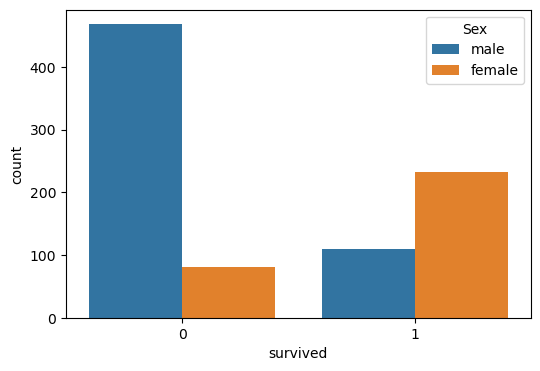

In [18]:
plt.figure(figsize=(6,4))
sns.countplot(data=train,hue='Sex',x='Survived')
plt.xlabel("survived")
plt.ylabel("count")
plt.show()

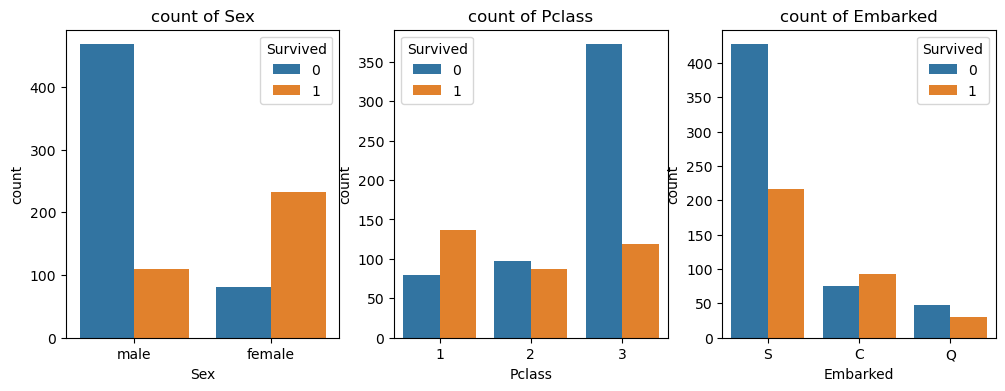

In [19]:
cat_cols=['Sex','Pclass','Embarked']
plt.figure(figsize=(12,4))
for i,col in enumerate(cat_cols):
    plt.subplot(1,3,i+1)
    sns.countplot(data=train,hue='Survived',x=col)
    plt.title(f"count of {col}")
plt.show()
    


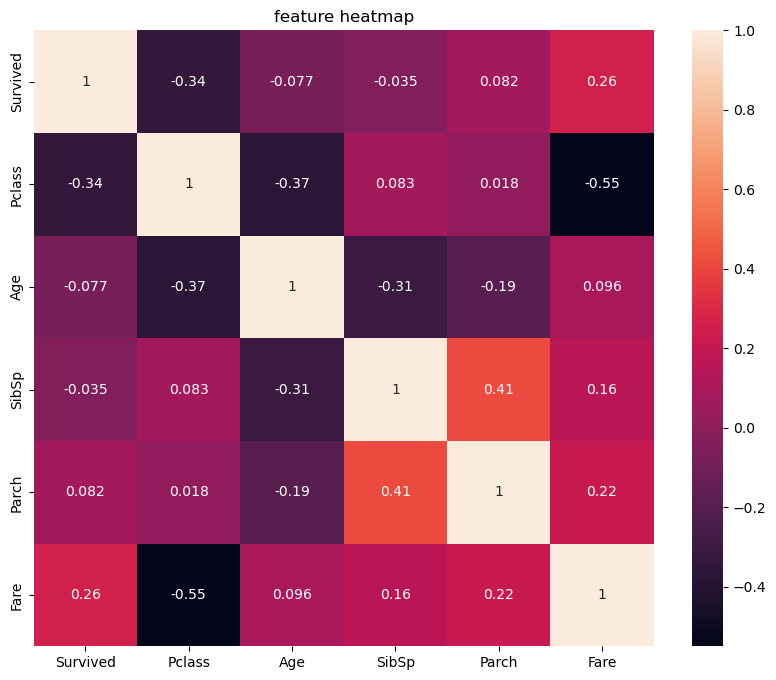

In [20]:
train_data=train.select_dtypes(include=['number'])
corr_matrix=train_data.corr() #>0.5 <-0.5 good
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix,annot=True)
plt.title("feature heatmap")
plt.show()

In [21]:
train.drop(['Parch'],inplace=True,axis=1)

In [22]:
train.head(5)

,Survived,Pclass,Sex,Age,SibSp,Fare,Embarked
0,0,3,male,22.0,1,7.2500,S
1,1,1,female,38.0,1,71.2833,C
2,1,3,female,26.0,0,7.9250,S
3,1,1,female,35.0,1,53.1000,S
4,0,3,male,35.0,0,8.0500,S


In [23]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.preprocessing import LabelEncoder,StandardScaler

In [24]:
le=LabelEncoder()

In [25]:

    train['Sex']=le.fit_transform(train['Sex'])
    train['Embarked']=le.fit_transform(train['Embarked'])
    test['Sex']=le.fit_transform(test['Sex'])
    test['Embarked']=le.fit_transform(test['Embarked'])
    

In [26]:
import warnings 
warnings.filterwarnings('ignore') 
train['Age'].fillna(train['Age'].mean(),inplace=True,)
train['Embarked'].fillna(train['Embarked'].mode()[0],inplace=True)
test['Age'].fillna(test['Age'].mean(),inplace=True,)
test['Embarked'].fillna(test['Embarked'].mode()[0],inplace=True)


In [27]:
train.head(10)

,Survived,Pclass,Sex,Age,SibSp,Fare,Embarked
0,0,3,1,22.000000,1,7.2500,2
1,1,1,0,38.000000,1,71.2833,0
2,1,3,0,26.000000,0,7.9250,2
3,1,1,0,35.000000,1,53.1000,2
4,0,3,1,35.000000,0,8.0500,2
5,0,3,1,29.699118,0,8.4583,1
6,0,1,1,54.000000,0,51.8625,2
7,0,3,1,2.000000,3,21.0750,2
8,1,3,0,27.000000,0,11.1333,2
9,1,2,0,14.000000,1,30.0708,0


In [28]:
train.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Fare        0
Embarked    0
dtype: int64

In [29]:
features=train.drop(columns=['Survived']).columns

In [30]:
features

Index(['Pclass', 'Sex', 'Age', 'SibSp', 'Fare', 'Embarked'], dtype='object')

In [31]:
X=train[features] #or we can write x=df.drop(colums='survived'])
y=train['Survived']

In [32]:
X_test=test[features]

In [33]:
sc=StandardScaler()

In [34]:
X[['Age','Fare']]=sc.fit_transform(X[['Age','Fare']])
X_test[['Age','Fare']]=sc.transform(X_test[['Age','Fare']])

In [35]:
X_test.head(5)

,Pclass,Sex,Age,SibSp,Fare,Embarked
0,3,1,0.369449,0,-0.490783,1
1,3,0,1.331378,1,-0.507479,2
2,2,1,2.485693,0,-0.453367,1
3,3,1,-0.207709,0,-0.474005,2
4,3,0,-0.592481,1,-0.401017,2


In [36]:
X_train,X_val,y_train,y_val=train_test_split(X,y,test_size=0.2,random_state=42)

In [37]:
model=RandomForestClassifier(n_estimators=100,random_state=42)

In [38]:
model.fit(X_train,y_train)

RandomForestClassifier(random_state=42)

In [39]:
y_val_pred=model.predict(X_val)

In [40]:
y_val_pred

array([0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 1, 1], dtype=int64)

In [41]:
acc=accuracy_score(y_val,y_val_pred)
print('validation accuracy ',acc)

validation accuracy  0.8156424581005587


In [42]:
con_matrix=confusion_matrix(y_val,y_val_pred)
print('confusion matrix\n',con_matrix)

confusion matrix
 [[91 14]
 [19 55]]


In [43]:
print('classification report\n',classification_report(y_val,y_val_pred))

classification report
               precision    recall  f1-score   support

           0       0.83      0.87      0.85       105
           1       0.80      0.74      0.77        74

    accuracy                           0.82       179
   macro avg       0.81      0.80      0.81       179
weighted avg       0.81      0.82      0.81       179



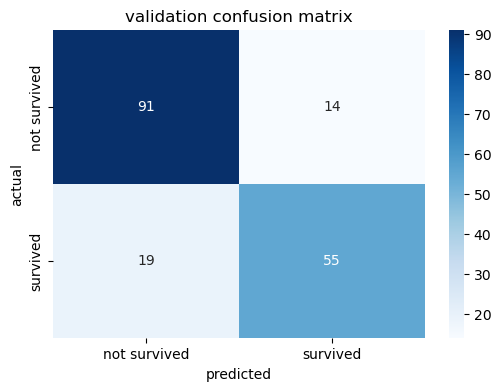

In [44]:
plt.figure(figsize=(6,4))
sns.heatmap(con_matrix,annot=True,cmap='Blues',xticklabels=['not survived','survived'],yticklabels=['not survived','survived'])
plt.xlabel('predicted')
plt.ylabel('actual')
plt.title('validation confusion matrix')
plt.show()

In [45]:
y_test_pred=model.predict(X_test)

In [46]:
y_test_pred

array([0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [47]:
output=pd.DataFrame({'PassengerId':test['PassengerId'],'survived':y_test_pred})

In [48]:
output.head(5)

,PassengerId,survived
0,892,0
1,893,0
2,894,0
3,895,1
4,896,0


In [49]:
#can also perform hyper parameter tuning